In [5]:
import numpy as np
import random 
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

In [6]:
def gini(x):
    
    mad = np.abs(np.subtract.outer(x, x)).mean()
   
    rmad = mad/np.mean(x)
    
    
    
    g = 0.5 * rmad
    return g

In [7]:
N = 500 #N - число агентов 

In [17]:
m=[] # m - массив, в котоом m[i] - сумма денег i-ого агента
M=0
m0 = 1000
for i in range(int(N)):
    m.append(m0) #в начальных условиях у всех одинаковое число денег 
    M=M+m0
# M - сумма всех денег в системе, остается постоянной с течением времени 

In [18]:
steps=400000 # число изменений в системе
t=0
gini_model = []
while(t<steps):
    # выбираем рандомную пару агентов 
    i = random.randint(0, int(N)-1 )
    j = random.randint(0, int(N)-1 )
    if(i==j): #чтобы были выбраны 2 разных агента 
        continue
    else:
        q = random.random() # выбираем случайное число от 0 до 1 - доля от среднего двух агентов, которая пойдет в обмен 
        delta_m = q*(m[i]+m[j])/2
        
        winner = random.choice([i,j]) #выбираем победителя случайно 
        if(winner==i):
            loser = j
        else:
            loser = i 
        
        if(m[loser]-delta_m<0): # обмен происходит только тогда, когда нет кредитов 
            continue
        else:
            # производим обмен при отсутствии кредитов 
            m[loser] = m[loser]-delta_m
            m[winner] = m[winner] + delta_m
            t=t+1 # переходим к следующему шагу 
            if(t%16000==0):
                gini_model.append(gini(m))
            

        



    
print("finish")    


finish


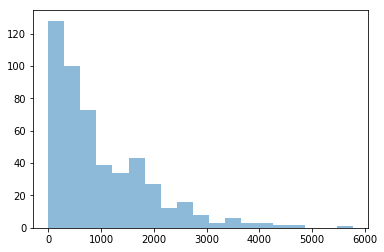

In [19]:



plt.hist(m, bins='auto', alpha = 0.5)  
 
plt.show()

In [20]:
print(sum(m))

500000.0000000001


In [21]:
v = gini(m)
print(v)  # коэффициент Джини в рамках симуляции 

0.4898146010114269


In [22]:
gini_stat = [0.387,0.387,0.390,0.394, 0.400,0.395,0.397,0.397,0.403,0.409,0.409,0.415,0.422,0.421,0.421,0.421,0.417,0.420,0.419,0.416,0.413,0.412,0.409, 0.411]

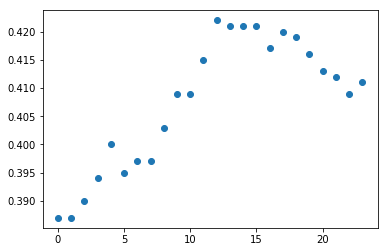

In [23]:
plt.plot([i for i in range(len(gini_stat))], gini_stat, 'o') #коэффициенты Джини из релаьных данных росстата 

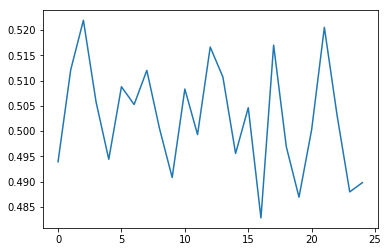

In [27]:

plt.plot([i for i in range(len(gini_model))], gini_model, '-') #это график коэффициентов Джини с течением времени 